# Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not

# Importing the dataset

In [6]:
import pandas as pd

# Read the train file
df_train = pd.read_csv('C:/Users/Sayan Mondal/Downloads/termdeposit_train.csv')

# Read the test file
df_test = pd.read_csv('C:/Users/Sayan Mondal/Downloads/termdeposit_test.csv')

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Description of the dataset

In [9]:
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [10]:
df_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [13]:
df_train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [14]:
df_test.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,22704.057726,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,12994.043329,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,1.000000,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11546.000000,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,22782.000000,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33974.250000,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45206.000000,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


In [15]:
df_train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [16]:
df_test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [39]:
df_train.drop(columns=['default'], inplace=True)

In [40]:
df_test.drop(columns=['default'], inplace=True)

In [41]:
df_train['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
others            206
Name: job, dtype: int64

In [42]:
df_test['job'].value_counts()

blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
others             82
Name: job, dtype: int64

In [43]:
df_train['job'] = df_train['job'].replace('unknown', 'others')
df_train['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
others            206
Name: job, dtype: int64

In [44]:
df_test['job'] = df_test['job'].replace('unknown', 'others')
df_test['job'].value_counts()

blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
others             82
Name: job, dtype: int64

In [45]:
df_train['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

In [46]:
df_test['marital'].value_counts()

married     8119
single      3868
divorced    1577
Name: marital, dtype: int64

In [47]:
df_test['education'].value_counts()

secondary    6978
tertiary     4000
primary      2043
others        543
Name: education, dtype: int64

In [48]:
df_train['education'] = df_train['education'].replace('unknown', 'others')
df_train['education'].value_counts()

secondary    16224
tertiary      9301
primary       4808
others        1314
Name: education, dtype: int64

In [49]:
df_test['education'].value_counts()

secondary    6978
tertiary     4000
primary      2043
others        543
Name: education, dtype: int64

In [50]:
df_test['education'] = df_test['education'].replace('unknown', 'others')
df_test['education'].value_counts()

secondary    6978
tertiary     4000
primary      2043
others        543
Name: education, dtype: int64

# DATA VISUALIZATION

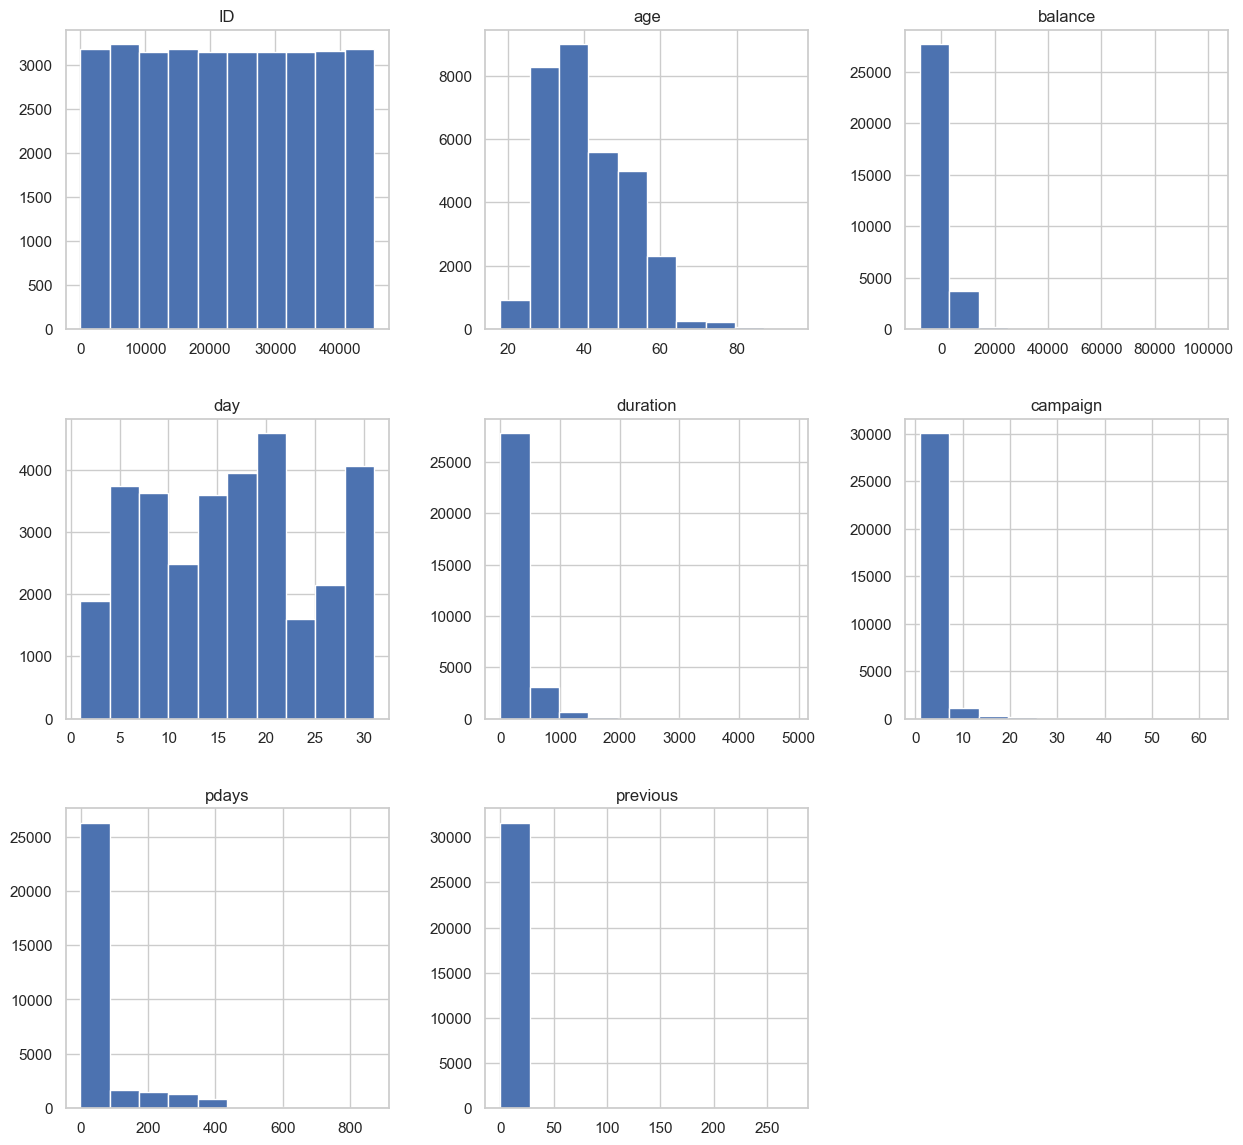

In [51]:
# Histograms for numerical variables
df_train.hist(figsize=(15, 14))
plt.show()


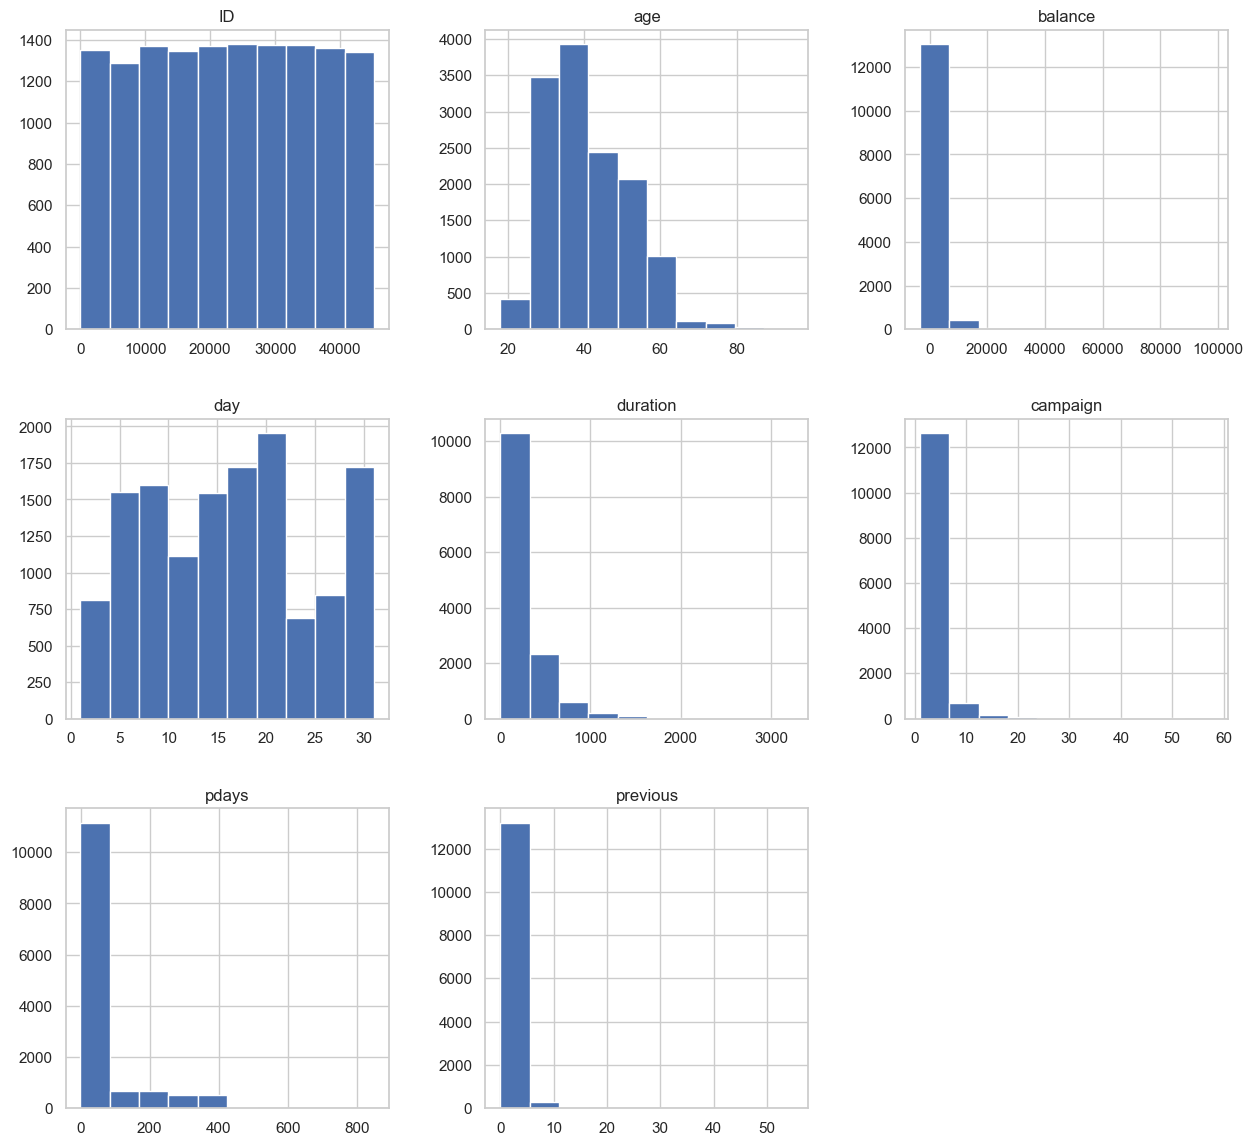

In [52]:
# Histograms for numerical variables
df_test.hist(figsize=(15, 14))
plt.show()


C:\Users\Sayan Mondal\AppData\Local\Temp\ipykernel_10584\2348762905.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(df_train['age'], bins=50, kde=True, palette='viridis')


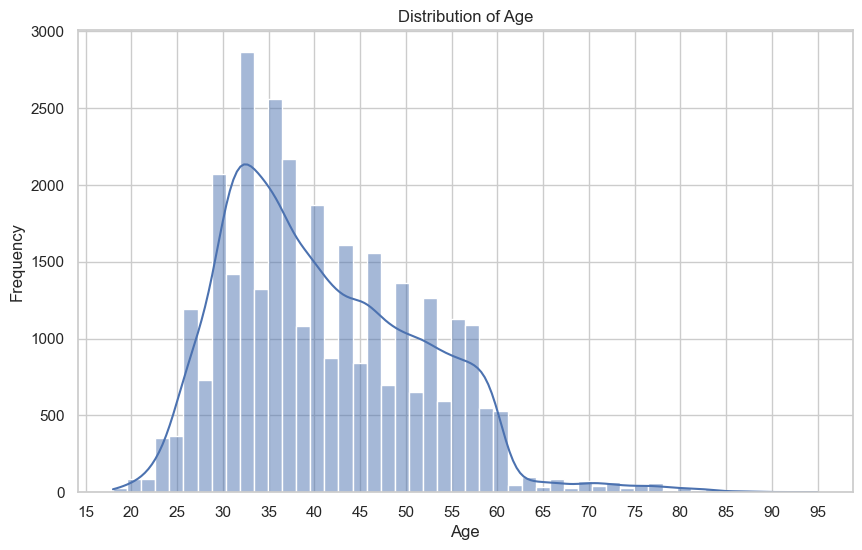

In [53]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
ax = sns.histplot(df_train['age'], bins=50, kde=True, palette='viridis')

# Add labels and title
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks([i for i in range(15, 100, 5)])


# Show the plot
plt.show()

C:\Users\Sayan Mondal\AppData\Local\Temp\ipykernel_10584\4205152478.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(df_test['age'], bins=50, kde=True, palette='viridis')


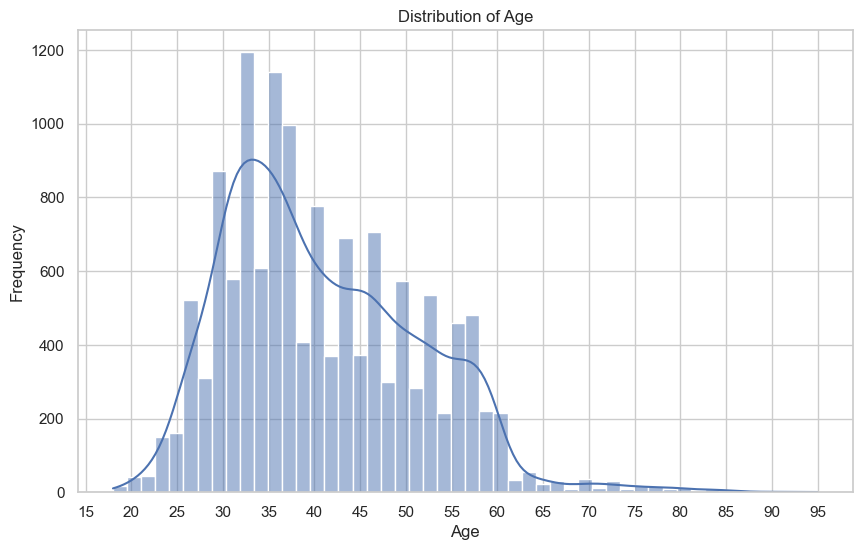

In [54]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
ax = sns.histplot(df_test['age'], bins=50, kde=True, palette='viridis')

# Add labels and title
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks([i for i in range(15, 100, 5)])


# Show the plot
plt.show()

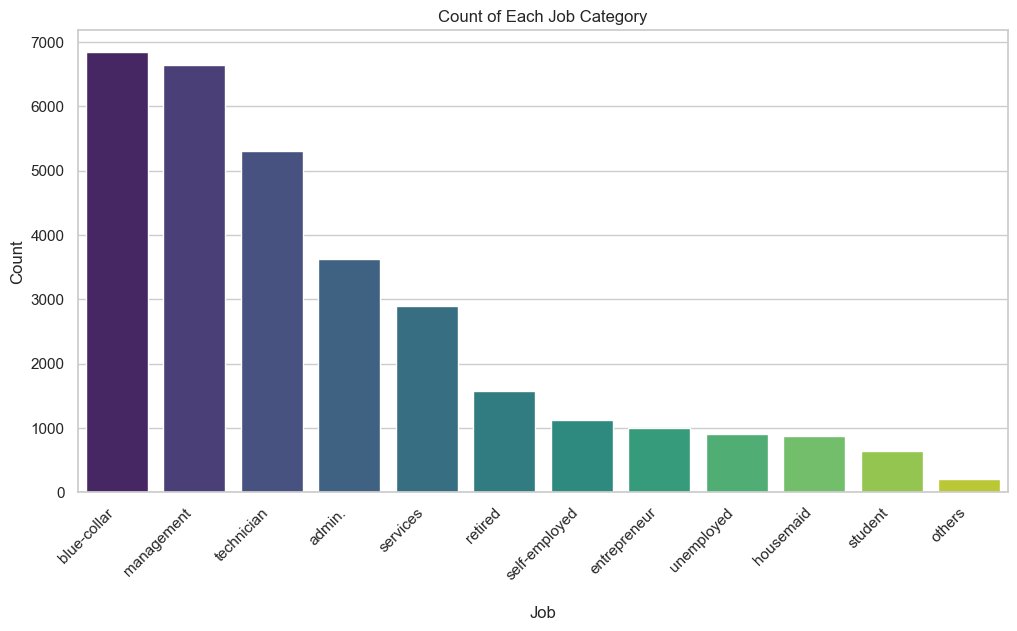

In [55]:
# Define counts
job_counts = df_train['job'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=job_counts.index, y=job_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Job Category')
plt.xlabel('\nJob')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

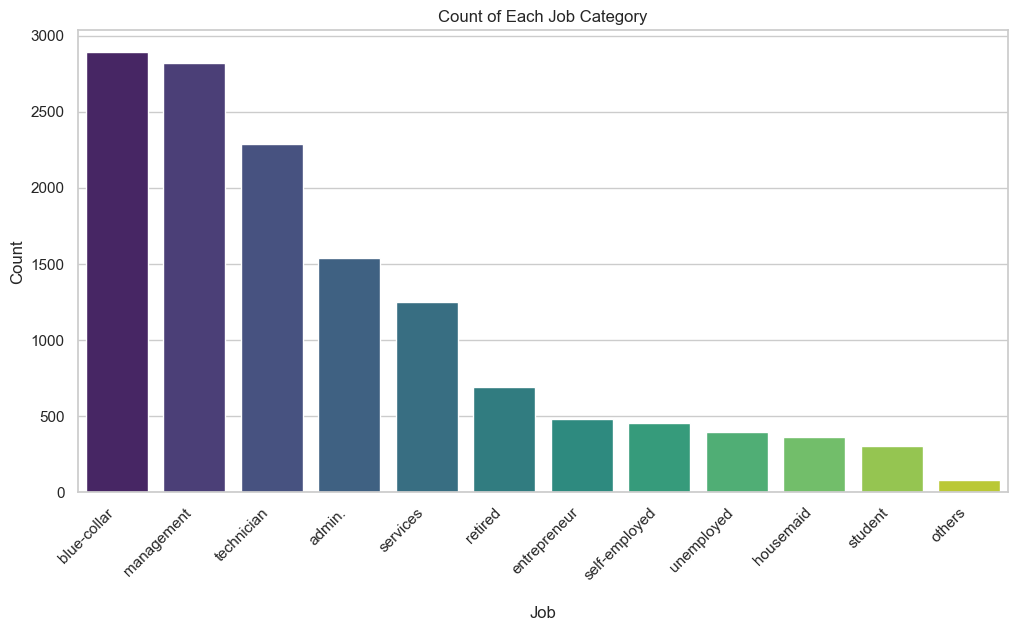

In [56]:
# Define counts
job_counts = df_test['job'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=job_counts.index, y=job_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Job Category')
plt.xlabel('\nJob')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

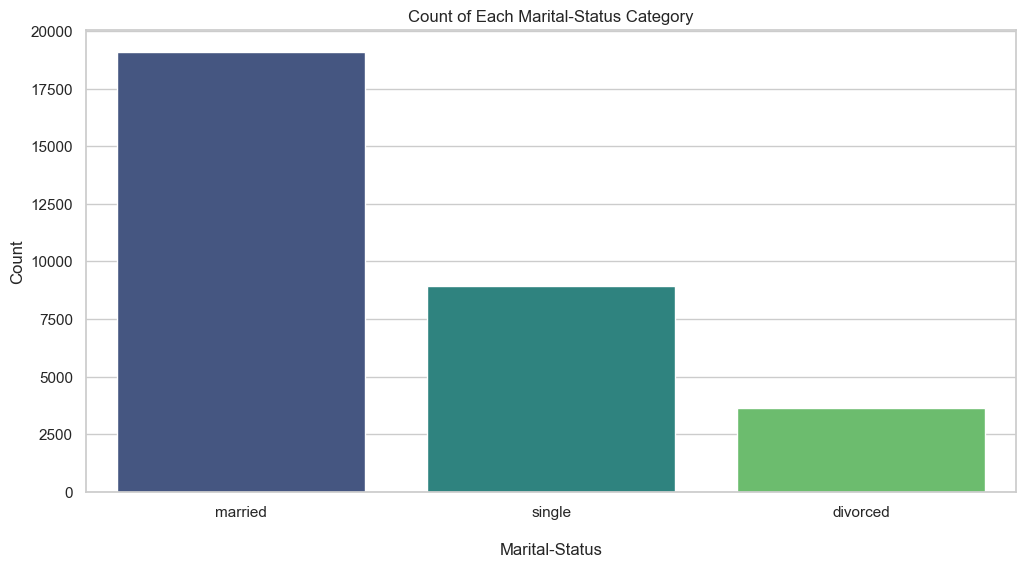

In [57]:
# Define counts
marital_counts = df_train['marital'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=marital_counts.index, y=marital_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Marital-Status Category')
plt.xlabel('\nMarital-Status')
plt.ylabel('Count')

# Show the plot
plt.show()

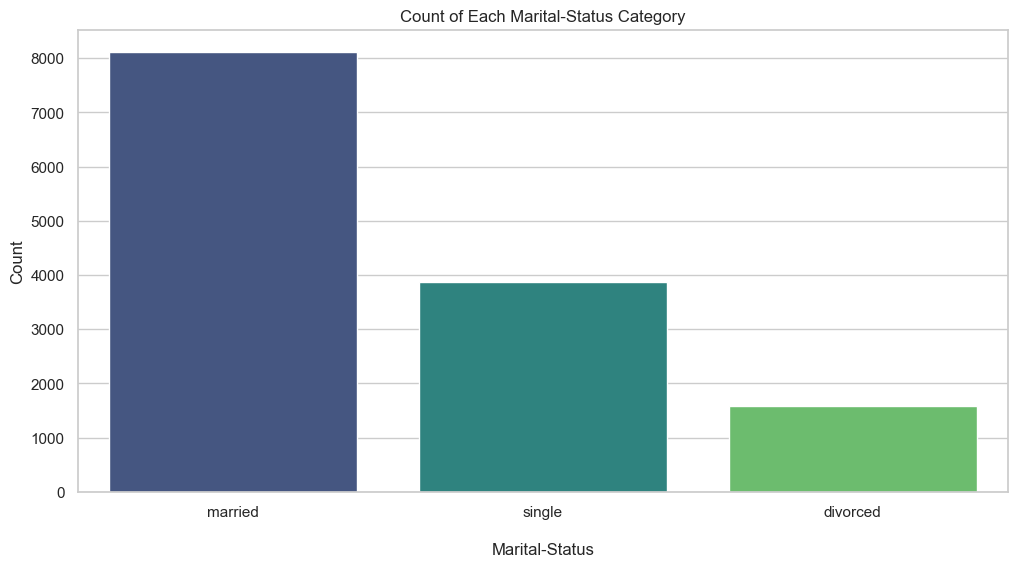

In [58]:
# Define counts
marital_counts = df_test['marital'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=marital_counts.index, y=marital_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Marital-Status Category')
plt.xlabel('\nMarital-Status')
plt.ylabel('Count')

# Show the plot
plt.show()

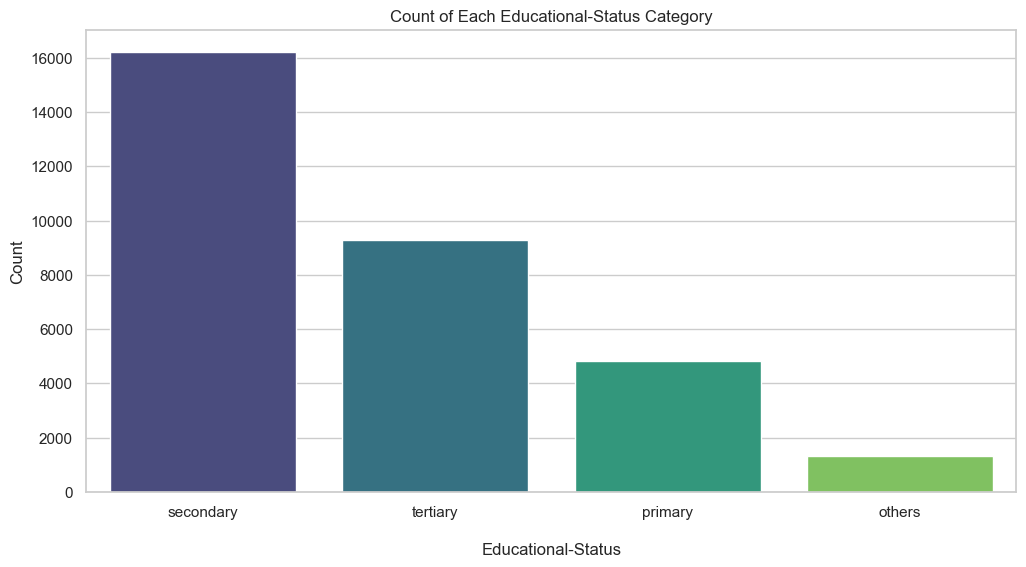

In [59]:
# Define Counts
education_counts = df_train['education'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=education_counts.index, y=education_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Educational-Status Category')
plt.xlabel('\nEducational-Status')
plt.ylabel('Count')

# Show the plot
plt.show()

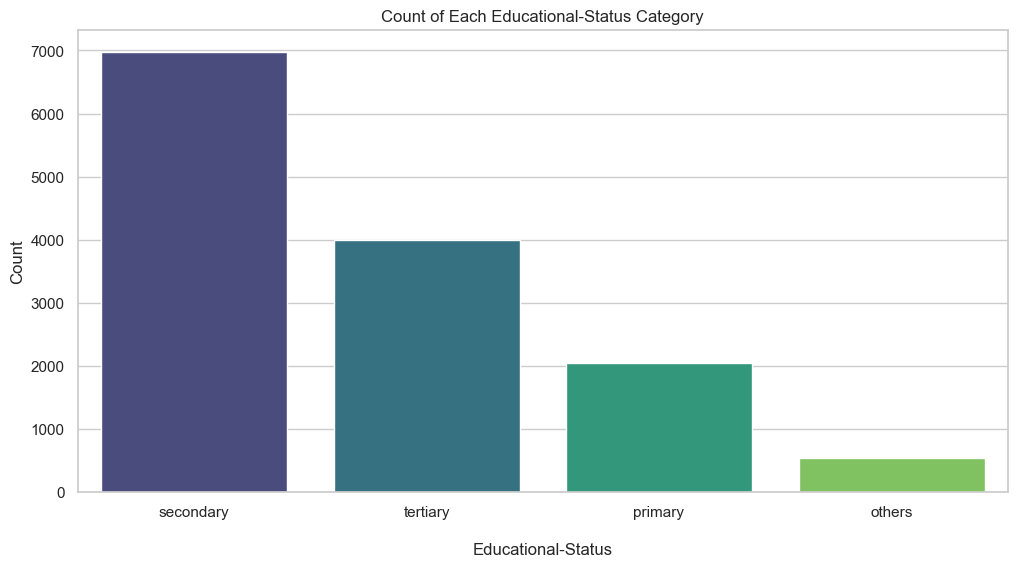

In [60]:
# Define Counts
education_counts = df_test['education'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=education_counts.index, y=education_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Educational-Status Category')
plt.xlabel('\nEducational-Status')
plt.ylabel('Count')

# Show the plot
plt.show()

C:\Users\Sayan Mondal\AppData\Local\Temp\ipykernel_10584\313622134.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df_train['balance'], palette='viridis')


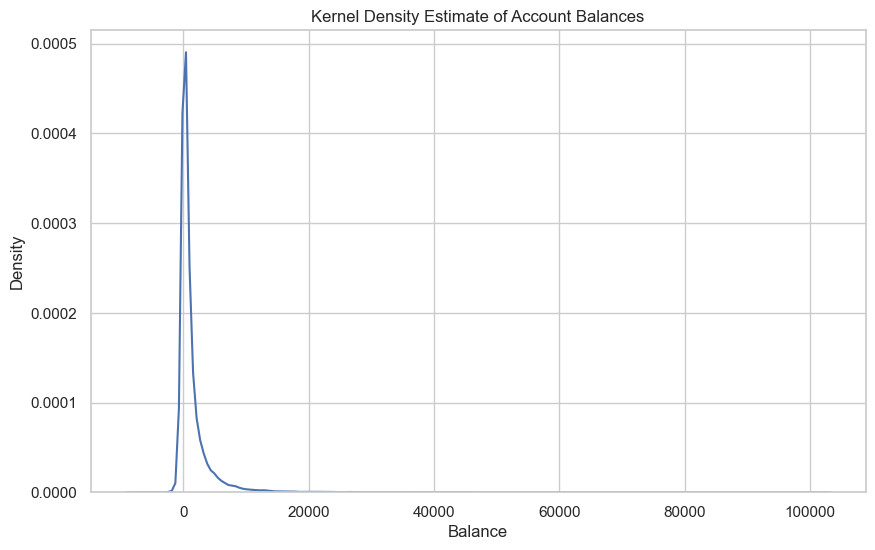

In [64]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.kdeplot(df_train['balance'], palette='viridis')

# Add labels and title
plt.title('Kernel Density Estimate of Account Balances')
plt.xlabel('Balance')
plt.ylabel('Density')

# Show the plot
plt.show()

C:\Users\Sayan Mondal\AppData\Local\Temp\ipykernel_10584\3732088137.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df_test['balance'], palette='viridis')


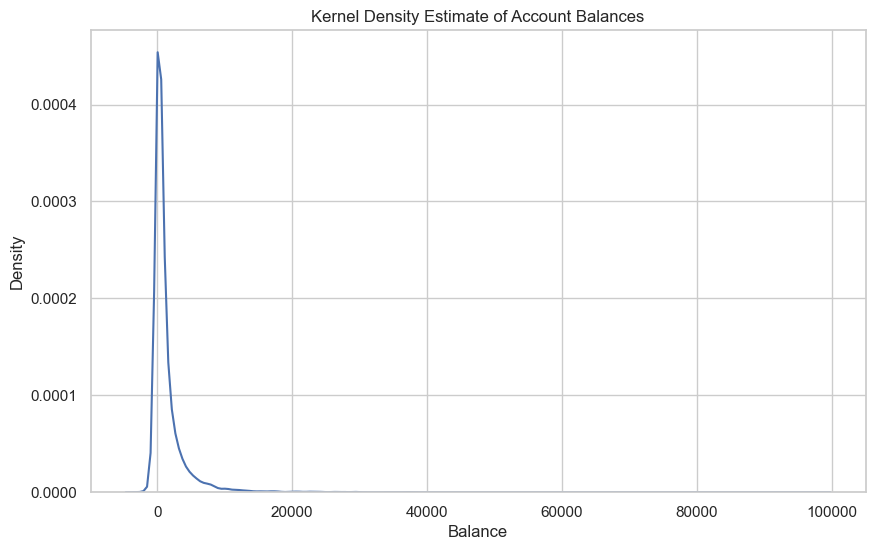

In [66]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.kdeplot(df_test['balance'], palette='viridis')

# Add labels and title
plt.title('Kernel Density Estimate of Account Balances')
plt.xlabel('Balance')
plt.ylabel('Density')

# Show the plot
plt.show()

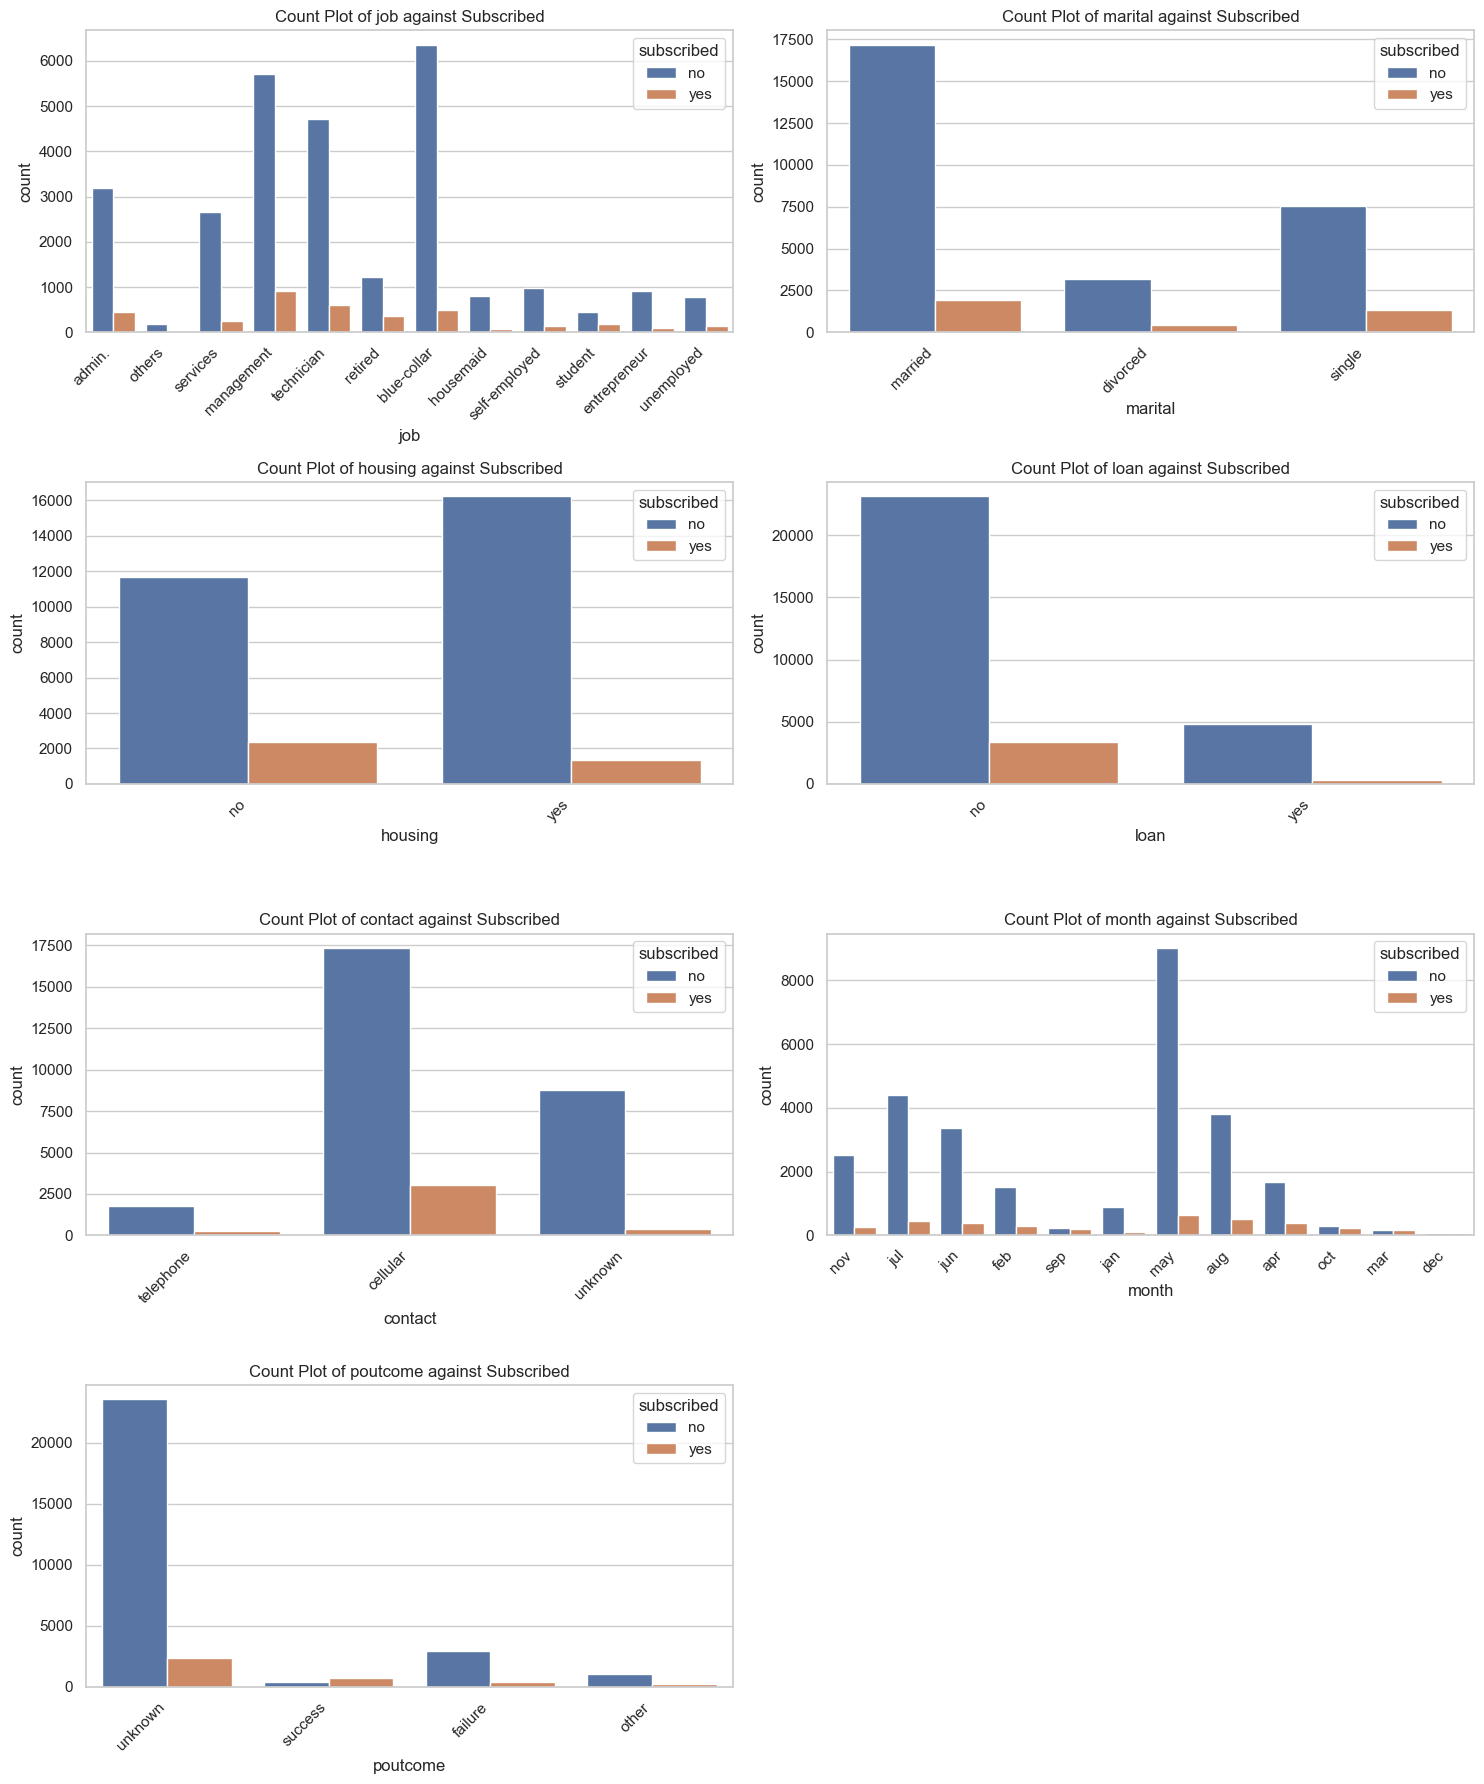

In [70]:
numerical_cols = df_train.select_dtypes(['int64']).columns
ordinal_cols = ['education']
nominal_cols = df_train.select_dtypes(['object']).drop(['education'], axis=1).columns
# Create subplots
rows_nominal = len(nominal_cols) // 2 + len(nominal_cols) % 2
columns_nominal = 2
plt.figure(figsize=(15, 18))

for i, col in enumerate(nominal_cols[:-1], start=1):
    plt.subplot(rows_nominal, columns_nominal, i)
    ax = sns.countplot(x=col, hue='subscribed', data=df_train)
    plt.title(f'Count Plot of {col} against Subscribed')
    
    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adjust layout
plt.tight_layout()
plt.show()

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
# Get all column names
column_names = df_train.columns

# Print column names
for column_name in column_names:
    print(column_name)

ID
age
job
marital
education
balance
housing
loan
contact
day
month
duration
campaign
pdays
previous
poutcome
subscribed


In [80]:
columns = ['ID', 'age', 'job', 'marital', 'education', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'subscribed']
for col in columns:
    unique_values = df_train[col].unique()
    print(f"Unique values in column {col}: {unique_values}")


Unique values in column ID: [26110 40576 15320 ... 19710 38556 14156]
Unique values in column age: [56 31 27 57 33 50 45 35 36 44 39 43 41 53 64 48 60 29 30 42 46 32 63 47
 49 52 68 26 58 38 54 40 59 24 37 34 61 55 20 69 25 62 22 51 28 70 66 23
 87 71 74 81 73 76 72 84 19 79 75 21 83 80 67 18 77 65 82 86 78 88 92 95
 93 89 94 90]
Unique values in column job: ['admin.' 'others' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']
Unique values in column marital: ['married' 'divorced' 'single']
Unique values in column education: ['others' 'secondary' 'tertiary' 'primary']
Unique values in column balance: [1933    3  891 ... 2787 8741 2968]
Unique values in column housing: ['no' 'yes']
Unique values in column loan: ['no' 'yes']
Unique values in column contact: ['telephone' 'cellular' 'unknown']
Unique values in column day: [19 20 18 22  4  2  3  8 15  5 28  6 14  7 24 13  9 11 21 12 30 27 17 16
 25 10  1 29 26 31

In [81]:
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [94]:
df_train = df_train.apply(LabelEncoder().fit_transform)

In [95]:
df_train.head()

,ID,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,18299,38,0,1,0,2719,0,0,1,18,9,43,1,0,0,3,0
1,28379,13,5,1,2,822,0,0,0,19,5,90,1,0,0,3,0
2,10766,9,8,1,2,1709,1,0,0,17,5,239,0,0,0,3,0
3,30772,39,4,0,3,3815,0,0,0,21,6,864,0,79,3,2,1
4,20922,13,10,1,2,938,1,0,0,3,3,379,0,0,0,3,0


In [96]:
df_test = df_test.apply(LabelEncoder().fit_transform)

In [97]:
df_test.head()

,ID,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,11570,14,8,1,2,682,1,0,0,14,8,19,5,0,0,3
1,12143,60,6,0,1,2809,0,0,1,0,5,371,0,0,0,3
2,1104,13,7,2,3,708,1,0,2,15,8,673,0,0,0,3
3,11242,39,8,2,1,3226,1,0,1,12,8,64,1,0,0,3
4,3686,27,1,0,2,94,0,1,2,2,5,110,0,0,0,3


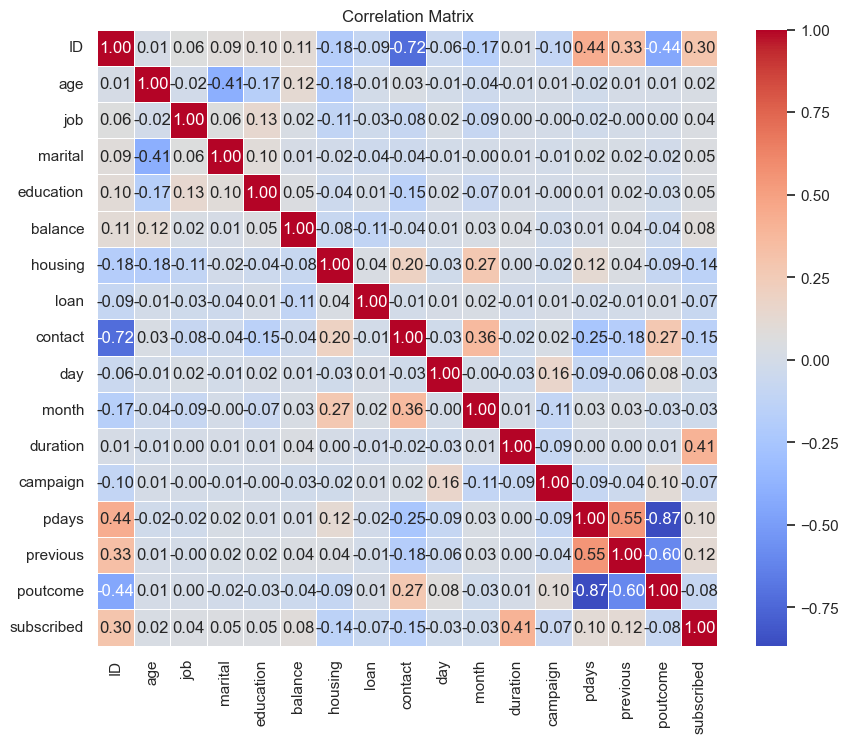

In [99]:
# Calculate the correlation matrix
correlation_matrix = df_train.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [100]:
X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1]

In [101]:
X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]

In [106]:
from sklearn.svm import SVC
# SVC model
svc = SVC(C=5, gamma='auto')

# Train the model
svc.fit(X_train, y_train)

SVC(C=5, gamma='auto')

In [109]:
#Train Score
print(svc.score(X_train, y_train))

0.9307359307359307
